In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r"D:\Code\Projects\Student Dippresion\Depression+Student+Dataset.csv",encoding= "unicode_escape")
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No


In [7]:
df.replace({'Gender': {'Female': 'F', 'Male': 'M'}}, inplace=True)

In [10]:
null_gender_rows = df[df['Gender'].isnull()]
null_gender_rows

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression


No Null value in gender

C:\Users\hp\AppData\Local\Temp\ipykernel_1116\2576120537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='coolwarm')


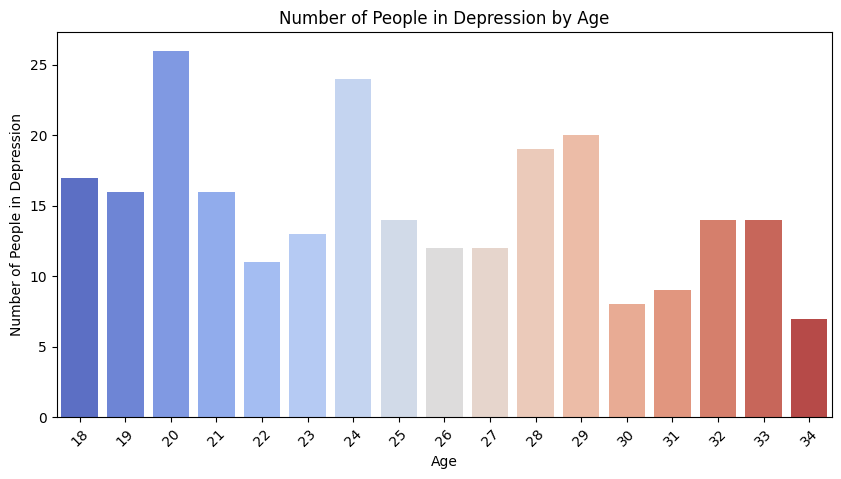

In [13]:
depression_counts = df[df['Depression'] == 'Yes']['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette='coolwarm')
plt.xlabel("Age")
plt.ylabel("Number of People in Depression")
plt.title("Number of People in Depression by Age")
plt.xticks(rotation=45)
plt.show()





In [16]:
df['Age Group'] = df['Age'].apply(lambda x: 'A1' if 18 <= x <= 24 else 'A2' if 25 <= x <= 30 else 'A3')
df

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age Group
0,M,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No,A2
1,M,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No,A2
2,M,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes,A2
3,M,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,A1
4,F,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No,A3
...,...,...,...,...,...,...,...,...,...,...,...,...
497,M,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes,A2
498,M,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes,A1
499,F,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No,A1
500,M,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No,A3


In [ ]:
age_group_counts = df['Age Group'].value_counts()
Academic = df['Academic Pressure'].value_counts()
Study = df['Study Satisfaction'].value_counts()
suicidal_thoughts = df['Have you ever had suicidal thoughts ?'].value_counts()
age_group_counts
Academic
suicidal_thoughts
Study

Have you ever had suicidal thoughts ?
Yes    260
No     242
Name: count, dtype: int64

In [31]:
if 'Family History of Mental Illness' in df.columns:
    Mental_Illness_yes = df[(df['Family History of Mental Illness'] == 'Yes') & (df['Depression'] == 'Yes')].shape[0]
    Mental_Illness_no = df[(df['Family History of Mental Illness'] == 'No') & (df['Depression'] == 'Yes')].shape[0]

print(f"Number of people with Mental Illness who are in depression: {Mental_Illness_yes}\nNumber of people without Metal illness who are in depression: {Mental_Illness_no}")

Number of people with Mental Illness who are in depression: 126
Number of people without Metal illness who are in depression: 126


In [32]:
if 'Have you ever had suicidal thoughts ?' in df.columns:
    suicidal_depression_count = df[(df['Have you ever had suicidal thoughts ?'] == 'Yes') & (df['Depression'] == 'Yes')].shape[0]
    suicidal_depression_count_no = df[(df['Have you ever had suicidal thoughts ?'] == 'No') & (df['Depression'] == 'Yes')].shape[0]

print(f"Number of people with suicidal thoughts who are in depression: {suicidal_depression_count}\nNumber of people without suicidal thoughts who are in depression: {suicidal_depression_count_no}")

Number of people with suicidal thoughts who are in depression: 189
Number of people without suicidal thoughts who are in depression: 63
